<a href="https://colab.research.google.com/github/ricardoxam/analise_airbnb/blob/main/Analisando_os_Dados_do_Airbnb_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Toronto*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Toronto, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Obtenção dos Dados**

Aqui iremos inicializar todos os pacotes que serão utilizados na nossa analise.

Logo em seguida iremos realizar a leitura dos dados, para que possamos dar o tratamento necessário.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/ricardoxam/data_science/main/listings.csv")

## **Análise dos Dados**

Aqui apresentamos o dicionário de variáveis, ele é muito útil para a tradução daquilo que estamos vendo, e serve para que qualquer pessoa com um conhecimento mínimo, tenha acesso as interpretações corretas dos dados.

**Dicionário das variáveis**

* id - número de id único para o imóvel.
* nome - nome da propriedade. 
* host_id - id do dono da propriedade.
* neighbourhood_group - não possui valores preenchidos.
* neighbourhood - nome do bairro.
* latitude - coordenada da latitude da propriedade.
* longitude - coordenada da longitude da propriedade.
* room_type - tipo de quarto que é fornecido.
* price - preço da locação do imóvel.
* minimum_ningts - número de noites minimas para locação.
* number_of_reviews - número de avaliações para aquela propriedade.
* last_review - data da ultima avaliação
* reviews_per_month - quantidade de avaliações por mês
* calculated_host_listing_count - quantidade de imóveis que pertence ao mesmo dono
* availability_365 - número de dias de disponibilidade dentro de um ano.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,28,7,2017-12-04,0.09,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,94,180,169,2013-08-27,1.56,2,365
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,28,217,2018-10-10,1.79,2,365
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-06-25,0.21,1,159
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,NaN,Mount Pleasant West,43.69958,-79.38814,Entire home/apt,75,30,7,2018-10-17,0.10,1,345



##**Analise de variáveis e tipos**

Vamos observar quais são as nossas váriaveis e quantas entradas de cada variável nos possuimos, vemos aqui também o tipo de cada variável. É muito importante saber com que tipo de dado estamos lidando para que a nossa malipulação não provoque erros mais a frente.

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas: \t {}'.format(df.shape[0]))
print('Variáveis: \t {}\n'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 	 15084
Variáveis: 	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **Dados ausentes do *dataset***
Aqui estamos entendendo quantos valores, de cada coluna, são nulos ou faltantes. Isso é um fator muito importante na analise, pois a ausência desses dados podem acabar mudando a nossa percepção sobre a situação de maneira bastante consideval.  

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)


neighbourhood_group               1.000000
reviews_per_month                 0.230377
last_review                       0.230377
host_name                         0.000464
name                              0.000066
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## **Distribuição das Variáveis**

De maneira mais visual, plotamos histogramas para uma melhor visualização de cada variável envolvida no nosso *dataset* 

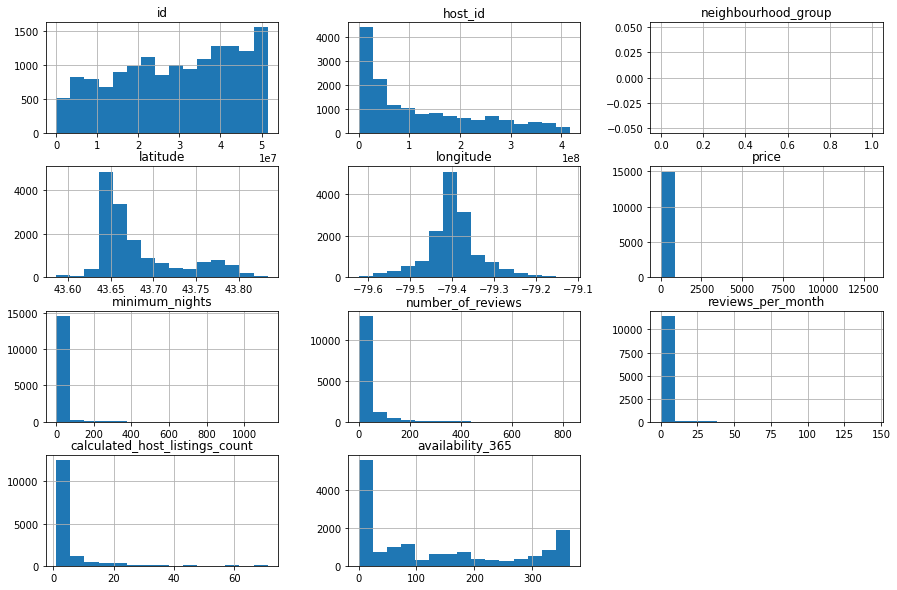

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(15,10))
plt.show()

## **Resumo estatístico das váriaveis numéricas**

Nesse momento temos uma visão estatística dos dados, isso ja nos fornece uma grande visão sobre os dados e podemos até formular algumas hipóteses inicialmente.  

In [ ]:
#Resumo estatístico das váriaveis numéricas
df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15084.000000,15084.000000,15084.000000,11609.000000,15084.000000,15084.000000
mean,156.388027,27.427208,25.836847,1.340099,4.329886,128.310130
std,365.588100,39.637649,52.503578,3.584430,8.432275,134.544809
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,28.000000,1.000000,0.160000,1.000000,0.000000
50%,100.000000,28.000000,5.000000,0.510000,1.000000,83.000000
75%,168.000000,28.000000,26.000000,1.430000,4.000000,243.000000
max,13000.000000,1125.000000,828.000000,144.000000,71.000000,365.000000


Podemos realizar algumas observações a partir da tabela acima, tais como:
* O `price` em 75% dos casos é menor que 168, mas podemos observar que o máximo encontrado é de 13000.
* Observamos também que o `minimum_nights` pode chegar a 1125 dias, fugindo dos 365 dias que compoe um ano.

## **Boxplot para minimum_nights**

Aqui faço uma plotagem para mostrar a quantidade de outliers existem para o mínimo de noites superior a 30 dias.

Porque esse recorte é importante? Imagine que uma pessoa irá viajar para Toronto, independente do motivo é dificil acreditar que alguem alugue uma residência por um tempo superior a 30 dias, conseguimos ver por esse recorte, que apenas 728 locais, tem esse tipo de especificação, o que representa 4,8% dos dados.

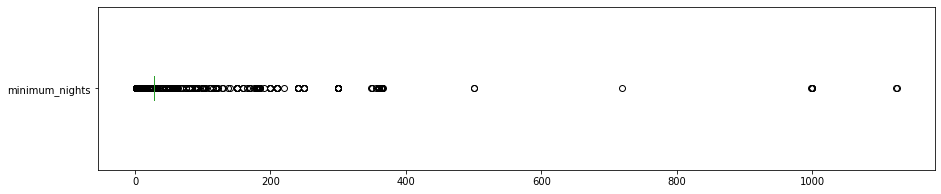

noites minimas de valores acima de 30:
728 entradas
4.8263%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print('noites minimas de valores acima de 30:')
print('{} entradas' .format(len(df.loc[(df.minimum_nights > 30)])))
print('{:.4f}%'.format((len(df.loc[df.minimum_nights > 30]) / df.shape[0])*100))

## **Boxplot para price**

Nesta situação, fazemos algo semelhante a plotagem anterior, agora me utilizando das informações da coluna `price`

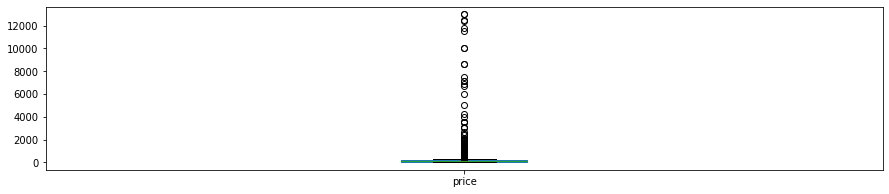


 price: Valores acima de 900
	137 entradas
	 0.9082%


In [ ]:
df.price.plot(kind='box',figsize=(15,3))
plt.show()

#quantidade de valores acima de 900 para price
print("\n price: Valores acima de 900")
print("\t{} entradas".format(len(df[df.price > 900])))
print("\t {:.4f}%".format((len(df[df.price > 900]) / df.shape[0])*100))

* **Aqui, como forma de tratamento, vamos utilizar localizações com preços de até 900, pois valores acima disso representam menos de 1% dos dados.**





## **Remoção de *outliers*** 

Aqui realizamos a limpeza em duas frentes:
* A primeira delas, na coluna `neighbourhood_group` que possui a sua totalidade de valores nulos, dessa forma tomamos a decisão de removê-la.
* Limitamos a analise em residências que possuem um mínimo de noites menores que 30 dias. 

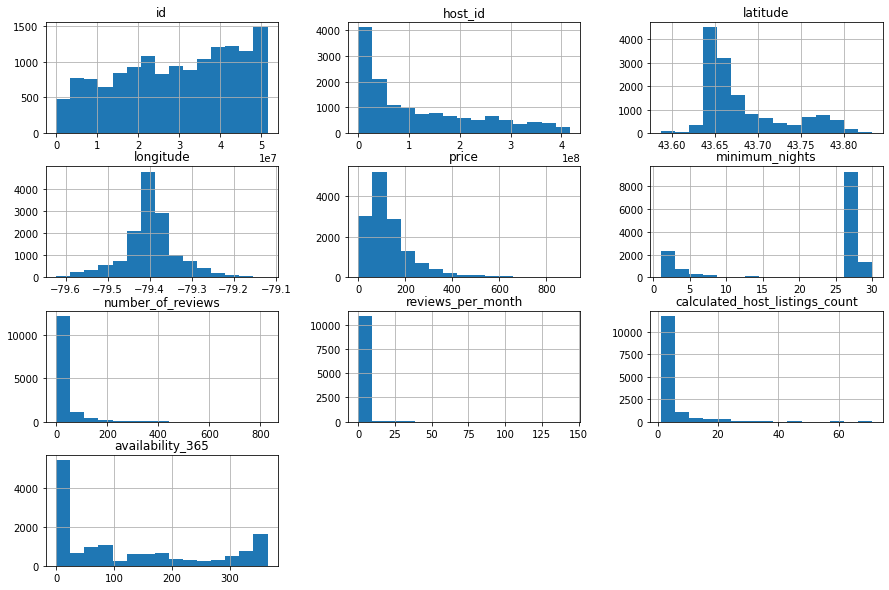

In [6]:
df_clear = df.copy()
df_clear.drop(df_clear[df_clear.price > 900].index, axis=0, inplace=True)

#Removendo a tabela neighbourhood_group pela grande incidencia de valores ausentes. 
df_clear.drop('neighbourhood_group', axis=1, inplace=True)
df_clear.drop(df_clear[df_clear.minimum_nights > 30].index, axis=0, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clear.hist(bins=15, figsize=(15,10) )

plt.show()


Percebe-se nos gráficos acima, na coluna `price` após um tratamento que ela apresenta uma distribuição um pouco mais uniforme dos preços. Na coluna `minimum_nights` percebemos também uma melhora significativa na distribuição, conseguindo realizar uma leitura mais clara das variáveis.

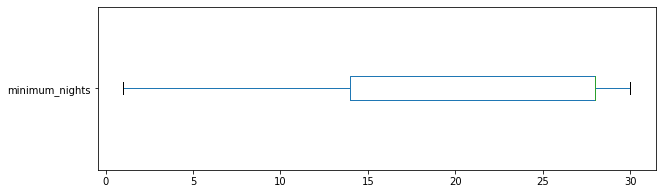

In [ ]:
df_clear.minimum_nights.plot(kind='box', vert=False, figsize=(10,3))
plt.show()

#### Observações:
* Notamos que as grande parte das pessoas que viajam para Toronto costuma passar menos de 27/28 dias na cidade.
* Conseguimos ver também que os valores de preço são inferiores a 200
* Poderia o valor ter uma ligação com o quantidade de noites mínimas?



### **Preço médio dos alugueis**

Como haviamos observado mais acima, o valor médio de locação de um imóvel é de 156

In [ ]:
# ver a média da coluna `price`
df.price.mean()

156.38802704852824

### **Correlação existente entre as variáveis**

Aqui estabelecemos correlações entre colunas selecionadas do nosso *dataset* na tentantiva de respondermos questionamentos, como por exemplo, o que foi feito logo mais acima.

In [ ]:
# criar uma matriz de correlação
corr = df_clear[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.108729,0.003869,0.050104,0.077966,0.062254
minimum_nights,-0.108729,1.000000,-0.203736,-0.267807,0.004837,-0.112018
number_of_reviews,0.003869,-0.203736,1.000000,0.335416,-0.065231,0.036303
reviews_per_month,0.050104,-0.267807,0.335416,1.000000,-0.033629,0.017153
calculated_host_listings_count,0.077966,0.004837,-0.065231,-0.033629,1.000000,0.143412
availability_365,0.062254,-0.112018,0.036303,0.017153,0.143412,1.000000


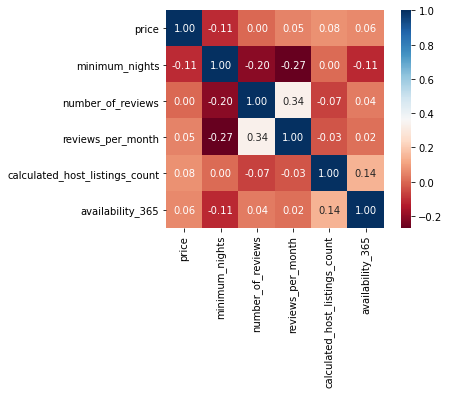

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.show()

####Analise do gráfico:
* Conseguimos observar pelo gráfico de calor, que a relação entre o preço e quantidade mínima de noites é negativa, respondendo a nossa pergunta anteriormente formulada.
* Conseguimos observar que existe uma pequena relação entre `calculated_host_listings_count` e `availability_365` 


### **Tipo de imóvel mais alugado na Airbnb Toronto**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clear.room_type.value_counts()


Entire home/apt    9174
Private room       4830
Shared room         179
Hotel room           43
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clear.room_type.value_counts() / df_clear.shape[0] 

Entire home/apt    0.644876
Private room       0.339519
Shared room        0.012583
Hotel room         0.003023
Name: room_type, dtype: float64

####Analise:
 * É observável que casas e apartamentos inteiros correspondem a maior parte dos imóveis alugados, representando 64% dos alugueis. 

### **A localidade mais cara do *dataset***



In [7]:
# ver preços por bairros, na média
df_clear.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Markland Wood                        267.600000
Kingsway South                       210.666667
Leaside-Bennington                   210.064516
Waterfront Communities-The Island    200.240000
Lawrence Park South                  195.068182
Bay Street Corridor                  172.546318
Niagara                              167.755633
Mount Pleasant East                  166.262295
Rosedale-Moore Park                  164.052632
The Beaches                          160.669231
Name: price, dtype: float64

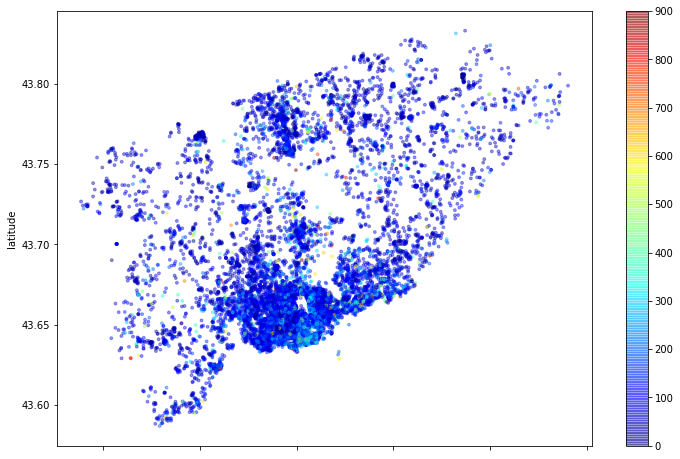

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clear.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.4, c=df_clear['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))
plt.show()


#### Analise:
Aqui podemos ver que o bairro mais caro seria o de "Markland Wood", que possui um valor médio de 267. Em analises mais pronfundas poderiamos observar se esse preço é puxado para cima devido a quantidade de imóveis para alugar no local. 

### **Média do mínimo de noites para aluguel (`minimum_nights`)**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clear.minimum_nights.mean()

21.73021228736117

## Conclusões


Consegui realizar uma analise dos dados do Airbnb, mesmo que superficial, que nos possibilitou gerar algumas hipóteses, e a afirmação ou negação das mesmas. Sem falar no processo de tratamento de dados que realizei, que foi de grande importância para o aprendizado como um todo. 